In [ ]:
import requests

def generate_image_func(promptarr):
    imagearr = []
    for prompt in promptarr:

        url = "https://lexica.art/api/v1/search?q={}".format(prompt)

        response = requests.request("GET", url)
        data = response.json()
        imageURL = data['images'][0]['src']

        imagearr.append(imageURL)
    
    return imagearr

In [ ]:
image = generate_image_func(["Deep Learning"])

In [ ]:
image

['https://lexica-serve-encoded-images.sharif.workers.dev/md/0057fe7a-3b4c-48fc-a679-2ed70e85f462']

In [ ]:
from PIL import Image, ImageFont, ImageDraw
import requests
from io import BytesIO

In [ ]:
response = requests.get(image[0])
img = Image.open(BytesIO(response.content))

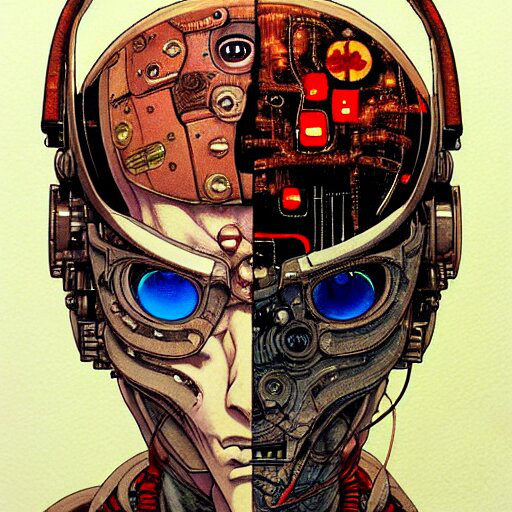

In [ ]:
img

In [ ]:
!pip install python-pptx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 15.9 MB/s eta 0:00:00
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470952 sha256=2cb00f83f53ae6f7cfce2e539c5e88338f754d1abc02d5e46adc07ebaa1b2ebd
  Stored in directory: /root/.cache/pip/wheels/b0/38/58/8530ed1681bfee42349acf166867cc9fb369517b2fce83e599
Successfully built python-pptx


In [ ]:
from pptx import Presentation
from pptx.util import Inches

prs = Presentation()
blank_slide_layout = prs.slide_layouts[3]
slide = prs.slides.add_slide(blank_slide_layout)


shapes = slide.shapes
title_shape = shapes.title
title_shape.text = 'Speech to Text Conversion'

# image_shape = shapes.placeholders[1]

# left = Inches(0.5)
# top = Inches(2)
# width = Inches(4)
# height = Inches(5)
# pict = image_shape.insert_picture(img_pth)

img_pth = image[0]
image_data = requests.get(img_pth).content
image_file = io.BytesIO(image_data)

left = Inches(0.52)
top = Inches(1.8)
width = Inches(4.4)
height = Inches(4.9)
pic = slide.shapes.add_picture(image_file, left, top,width=width, height=height)

firstPlaceholder = shapes.placeholders[1]
blankText = firstPlaceholder.text_frame
blankText.text = ' '

body_shape = shapes.placeholders[2]

tf = body_shape.text_frame
tf.text = 'The most famous right Now is whisper OpenAI'

p = tf.add_paragraph()
p.text = 'It is an openSource that means anybody can use it for free and transcribe the text.'
p.level = 1

p = tf.add_paragraph()
p.text = 'There are basically three model base, medium and large and based on efficiency we can use any of them.'
p.level = 2

prs.save('image.pptx')

In [ ]:
import io

In [ ]:
from pptx import Presentation
import requests

# Open an existing PowerPoint presentation
prs = Presentation()

# Add a new slide to the presentation
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Download the image from the URL
image_data = requests.get("https://thumbs.dreamstime.com/b/example-red-tag-example-red-square-price-tag-117502755.jpg").content
image_file = io.BytesIO(image_data)

# Add the image to the slide
picture = slide.shapes.add_picture(image_file, left=0, top=0)

# Save the updated presentation
prs.save('updated_presentation.pptx')